# BASIC STATISTICS CASE STUDY

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Business Problem - 1

In [4]:
LoansData = pd.read_csv("D:\Analytics lab\Python\Case Study\Basic Statistics - Hypothesis Testing\LoansData.csv")
LoansData.head()

Amount.Requested  Amount.Funded.By.Investors Interest.Rate Loan.Length  \
0           20000.0                     20000.0         8.90%   36 months   
1           19200.0                     19200.0        12.12%   36 months   
2           35000.0                     35000.0        21.98%   60 months   
3           10000.0                      9975.0         9.99%   36 months   
4           12000.0                     12000.0        11.71%   36 months   

         Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
0  debt_consolidation               14.90%    SC       MORTGAGE   
1  debt_consolidation               28.36%    TX       MORTGAGE   
2  debt_consolidation               23.81%    CA       MORTGAGE   
3  debt_consolidation               14.30%    KS       MORTGAGE   
4         credit_card               18.78%    NJ           RENT   

   Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         6541.67    735-739               14.0                   14272.0   
1         4583.33    715-719               12.0                   11140.0   
2        11500.00    690-694               14.0                   21977.0   
3         3833.33    695-699               10.0                    9346.0   
4         3195.00    695-699               11.0                   14469.0   

   Inquiries.in.the.Last.6.Months Employment.Length  
0                             2.0          < 1 year  
1                             1.0           2 years  
2                             1.0           2 years  
3                             0.0           5 years  
4                             0.0           9 years

In [5]:
LoansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [39]:
loans.Loan_Purpose.value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [6]:
LoansData['Interest.Rate'].value_counts()

12.12%    122
7.90%     119
13.11%    115
15.31%     76
14.09%     72
         ... 
11.09%      1
23.33%      1
14.18%      1
18.62%      1
19.04%      1
Name: Interest.Rate, Length: 275, dtype: int64

In [7]:
LoansData['Amount.Requested'].value_counts()

10000.0    206
12000.0    151
5000.0     110
20000.0    107
6000.0     103
          ... 
1675.0       1
16550.0      1
31075.0      1
9550.0       1
8475.0       1
Name: Amount.Requested, Length: 380, dtype: int64

In [8]:
LoansData.nunique()

Amount.Requested                   380
Amount.Funded.By.Investors         710
Interest.Rate                      275
Loan.Length                          2
Loan.Purpose                        14
Debt.To.Income.Ratio              1669
State                               46
Home.Ownership                       5
Monthly.Income                     632
FICO.Range                          38
Open.CREDIT.Lines                   29
Revolving.CREDIT.Balance          2349
Inquiries.in.the.Last.6.Months      10
Employment.Length                   11
dtype: int64

In [9]:
LoansData.groupby('Interest.Rate')['Amount.Requested'].mean()

Interest.Rate
10.00%     9725.000000
10.08%    15700.000000
10.16%    11615.957447
10.20%     3000.000000
10.25%    14406.250000
              ...     
9.63%     10027.272727
9.76%      9814.285714
9.88%     10487.500000
9.91%     14315.384615
9.99%      9654.545455
Name: Amount.Requested, Length: 275, dtype: float64

In [10]:
LoansData.describe()

Amount.Requested  Amount.Funded.By.Investors  Monthly.Income  \
count       2499.000000                 2499.000000     2499.000000   
mean       12405.462185                12002.374186     5688.931321   
std         7802.933666                 7746.767348     3963.118185   
min         1000.000000                   -0.010000      588.500000   
25%         6000.000000                 6000.000000     3500.000000   
50%        10000.000000                10000.000000     5000.000000   
75%        17000.000000                16000.000000     6800.000000   
max        35000.000000                35000.000000   102750.000000   

       Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
count        2497.000000               2497.000000   
mean           10.072887              15223.184622   
std             4.507416              18281.015258   
min             2.000000                  0.000000   
25%             7.000000               5584.000000   
50%             9.000000              10948.000000   
75%            13.000000              18861.000000   
max            38.000000             270800.000000   

       Inquiries.in.the.Last.6.Months  
count                     2497.000000  
mean                         0.906688  
std                          1.231149  
min                          0.000000  
25%                          0.000000  
50%                          0.000000  
75%                          1.000000  
max                          9.000000

In [11]:
LoansData.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [12]:
LoansData.head()

Amount.Requested  Amount.Funded.By.Investors Interest.Rate Loan.Length  \
0           20000.0                     20000.0         8.90%   36 months   
1           19200.0                     19200.0        12.12%   36 months   
2           35000.0                     35000.0        21.98%   60 months   
3           10000.0                      9975.0         9.99%   36 months   
4           12000.0                     12000.0        11.71%   36 months   

         Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
0  debt_consolidation               14.90%    SC       MORTGAGE   
1  debt_consolidation               28.36%    TX       MORTGAGE   
2  debt_consolidation               23.81%    CA       MORTGAGE   
3  debt_consolidation               14.30%    KS       MORTGAGE   
4         credit_card               18.78%    NJ           RENT   

   Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         6541.67    735-739               14.0                   14272.0   
1         4583.33    715-719               12.0                   11140.0   
2        11500.00    690-694               14.0                   21977.0   
3         3833.33    695-699               10.0                    9346.0   
4         3195.00    695-699               11.0                   14469.0   

   Inquiries.in.the.Last.6.Months Employment.Length  
0                             2.0          < 1 year  
1                             1.0           2 years  
2                             1.0           2 years  
3                             0.0           5 years  
4                             0.0           9 years

In [13]:
LoansData.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [14]:
catagorical_col = ['Interest.Rate','Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State','Home.Ownership',
                   'FICO.Range', 'Open.CREDIT.Lines','Inquiries.in.the.Last.6.Months', 'Employment.Length' ]
continious_col = ['Amount.Requested', 'Amount.Funded.By.Investors', 'Monthly.Income','Revolving.CREDIT.Balance']

In [15]:
for col in catagorical_col:
    LoansData[col] = LoansData[col].fillna(LoansData[col].mode()[0])
LoansData[continious_col] = LoansData[continious_col].fillna(LoansData[continious_col].mean())
LoansData.head()

Amount.Requested  Amount.Funded.By.Investors Interest.Rate Loan.Length  \
0           20000.0                     20000.0         8.90%   36 months   
1           19200.0                     19200.0        12.12%   36 months   
2           35000.0                     35000.0        21.98%   60 months   
3           10000.0                      9975.0         9.99%   36 months   
4           12000.0                     12000.0        11.71%   36 months   

         Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
0  debt_consolidation               14.90%    SC       MORTGAGE   
1  debt_consolidation               28.36%    TX       MORTGAGE   
2  debt_consolidation               23.81%    CA       MORTGAGE   
3  debt_consolidation               14.30%    KS       MORTGAGE   
4         credit_card               18.78%    NJ           RENT   

   Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         6541.67    735-739               14.0                   14272.0   
1         4583.33    715-719               12.0                   11140.0   
2        11500.00    690-694               14.0                   21977.0   
3         3833.33    695-699               10.0                    9346.0   
4         3195.00    695-699               11.0                   14469.0   

   Inquiries.in.the.Last.6.Months Employment.Length  
0                             2.0          < 1 year  
1                             1.0           2 years  
2                             1.0           2 years  
3                             0.0           5 years  
4                             0.0           9 years

In [16]:
LoansData.isna().sum()

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
FICO.Range                        0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
dtype: int64

In [17]:
LoansData['Interest.Rate'] = (LoansData['Interest.Rate'].str.strip('%').astype(float))

In [18]:
stats.pearsonr( LoansData['Interest.Rate'], LoansData['Amount.Requested'] )

PearsonRResult(statistic=0.33240946119905757, pvalue=1.4646809963118727e-65)

##### Business conclusion: 
##### We reject H0 - No relationship as p-value is very less
##### Ha - There is a relationship among the variables with 95% accuracy 
##### Hence Intrest rate is varied for different loan amounts

### b. Loan length is directly effecting interest rate.

In [20]:
LoansData.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [21]:
LoansData['Loan.Length'].nunique()

2

In [22]:
LoansData.head()

Amount.Requested  Amount.Funded.By.Investors  Interest.Rate Loan.Length  \
0           20000.0                     20000.0           8.90   36 months   
1           19200.0                     19200.0          12.12   36 months   
2           35000.0                     35000.0          21.98   60 months   
3           10000.0                      9975.0           9.99   36 months   
4           12000.0                     12000.0          11.71   36 months   

         Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
0  debt_consolidation               14.90%    SC       MORTGAGE   
1  debt_consolidation               28.36%    TX       MORTGAGE   
2  debt_consolidation               23.81%    CA       MORTGAGE   
3  debt_consolidation               14.30%    KS       MORTGAGE   
4         credit_card               18.78%    NJ           RENT   

   Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         6541.67    735-739               14.0                   14272.0   
1         4583.33    715-719               12.0                   11140.0   
2        11500.00    690-694               14.0                   21977.0   
3         3833.33    695-699               10.0                    9346.0   
4         3195.00    695-699               11.0                   14469.0   

   Inquiries.in.the.Last.6.Months Employment.Length  
0                             2.0          < 1 year  
1                             1.0           2 years  
2                             1.0           2 years  
3                             0.0           5 years  
4                             0.0           9 years

In [23]:
LoansData['Loan.Length'].value_counts()

36 months    1952
60 months     548
Name: Loan.Length, dtype: int64

In [24]:
usage = 'Interest.Rate'

In [26]:
# data processing for the test
s1 = LoansData.loc[ LoansData['Loan.Length'] == '36 months', usage ]
s2 = LoansData.loc[ LoansData['Loan.Length'] == '60 months', usage ]

print( 'mean s1:', s1.mean(), '| mean s2:', s2.mean() )

mean s1: 12.126173155737813 | mean s2: 16.40746350364961


In [27]:
stats.f_oneway( s1, s2)

F_onewayResult(statistic=548.3261736091927, pvalue=8.529143234124184e-110)

##### Business conclusion: 
##### We reject the H0 Hypothesis
##### Loan length is directly effecting intrest rate as p- value is very low with 99.99% accuracy.

### c. Inrest rate varies for different purpose of loans

In [28]:
obs_freq = pd.crosstab( LoansData['Interest.Rate'], LoansData['Loan.Purpose'] )

In [29]:
obs_freq.T

Interest.Rate       5.42   5.79   5.99   6.00   6.03   6.17   6.54   6.62   \
Loan.Purpose                                                                 
car                     0      1      0      0      3      0      0      3   
credit_card             2      2      1      0      7      0      1     11   
debt_consolidation      0      5      4      0     24      1      3     24   
educational             0      0      0      0      0      0      0      0   
home_improvement        5      2      3      1      5      1      1      4   
house                   0      0      1      0      1      0      0      1   
major_purchase          1      1      1      0      6      2      0      2   
medical                 1      0      0      0      2      0      1      1   
moving                  0      1      0      0      0      1      0      0   
other                   0      1      0      0      4      0      0      1   
renewable_energy        0      0      0      0      0      0      0      0   
small_business          0      1      0      0      4      0      0      1   
vacation                1      0      0      0      1      0      0      0   
wedding                 1      0      0      0      0      0      0      1   

Interest.Rate       6.76   6.91   ...  23.28  23.33  23.63  23.76  23.83  \
Loan.Purpose                      ...                                      
car                     0      1  ...      0      0      0      0      0   
credit_card             0      1  ...      1      0      0      1      0   
debt_consolidation      2      5  ...      3      1      1      5      2   
educational             1      0  ...      0      0      0      0      0   
home_improvement        0      0  ...      0      0      0      0      0   
house                   0      0  ...      0      0      0      0      0   
major_purchase          0      1  ...      0      0      0      0      0   
medical                 0      0  ...      1      0      0      0      0   
moving                  1      0  ...      0      0      0      1      0   
other                   0      0  ...      2      0      0      0      0   
renewable_energy        0      0  ...      0      0      0      0      0   
small_business          0      0  ...      0      0      0      0      0   
vacation                0      1  ...      0      0      0      0      0   
wedding                 0      0  ...      0      0      0      0      0   

Interest.Rate       23.91  24.20  24.33  24.70  24.89  
Loan.Purpose                                           
car                     0      0      0      0      0  
credit_card             0      0      0      1      0  
debt_consolidation      1      1      1      1      1  
educational             0      0      0      0      0  
home_improvement        0      0      0      0      0  
house                   0      0      0      0      0  
major_purchase          0      0      0      0      0  
medical                 0      0      0      0      0  
moving                  0      0      0      0      1  
other                   0      0      0      0      0  
renewable_energy        0      0      0      0      0  
small_business          0      0      0      0      0  
vacation                0      0      0      0      0  
wedding                 0      0      0      0      0  

[14 rows x 275 columns]

In [30]:
stats.chi2_contingency( obs_freq.T )

(4378.952129804514,
 8.396099408489274e-20,
 3562,
 array([[0.22  , 0.28  , 0.2   , ..., 0.02  , 0.04  , 0.04  ],
        [1.9536, 2.4864, 1.776 , ..., 0.1776, 0.3552, 0.3552],
        [5.7508, 7.3192, 5.228 , ..., 0.5228, 1.0456, 1.0456],
        ...,
        [0.3828, 0.4872, 0.348 , ..., 0.0348, 0.0696, 0.0696],
        [0.0924, 0.1176, 0.084 , ..., 0.0084, 0.0168, 0.0168],
        [0.1716, 0.2184, 0.156 , ..., 0.0156, 0.0312, 0.0312]]))

##### Business conclusion: 
##### We reject the H0 Hypothesis
##### Loan length is directly effecting intrest rate as p- value is very low with 99.99% accuracy.

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [31]:
obs_freq_1 = pd.crosstab( LoansData['Home.Ownership'], LoansData['FICO.Range'] )

In [32]:
stats.chi2_contingency( obs_freq_1 )

(473.5648028168521,
 1.0065160858471904e-35,
 148,
 array([[2.29600e+00, 1.37760e+00, 4.59200e-01, 1.83680e+00, 5.74000e+01,
         6.65840e+01, 7.94416e+01, 7.62272e+01, 7.20944e+01, 6.24512e+01,
         6.42880e+01, 7.02576e+01, 6.01552e+01, 6.15328e+01, 5.14304e+01,
         4.27056e+01, 5.23488e+01, 4.31648e+01, 4.31648e+01, 2.98480e+01,
         2.43376e+01, 2.47968e+01, 2.80112e+01, 2.11232e+01, 2.11232e+01,
         1.65312e+01, 7.80640e+00, 1.01024e+01, 1.28576e+01, 8.72480e+00,
         9.18400e+00, 5.96960e+00, 5.96960e+00, 5.05120e+00, 3.67360e+00,
         2.75520e+00, 4.59200e-01, 4.59200e-01],
        [2.00000e-03, 1.20000e-03, 4.00000e-04, 1.60000e-03, 5.00000e-02,
         5.80000e-02, 6.92000e-02, 6.64000e-02, 6.28000e-02, 5.44000e-02,
         5.60000e-02, 6.12000e-02, 5.24000e-02, 5.36000e-02, 4.48000e-02,
         3.72000e-02, 4.56000e-02, 3.76000e-02, 3.76000e-02, 2.60000e-02,
         2.12000e-02, 2.16000e-02, 2.44000e-02, 1.84000e-02, 1.84000e-02,
         1.4

##### Business conclusion: 
##### We reject the H0 Hypothesis
##### There is relationship between FICO scores and Home Ownership. It means that, People 
##### with owning home will have high FICO scores. as p- value is very low with 99.99% accuracy.

## Business Problem - 2

In [33]:
Price_Quotes = pd.read_csv("D:\Analytics lab\Python\Case Study\Basic Statistics - Hypothesis Testing\Price_Quotes.csv")
Price_Quotes

Order_Number  Barry_Price  Mary_Price
0              1          126         114
1              2          110         118
2              3          138         114
3              4          142         111
4              5          146         129
5              6          136         119
6              7           94          97
7              8          103         104
8              9          140         127
9             10          152         133
10            11          108         103
11            12           97         108

In [34]:
Barry_Price_mean = Price_Quotes.Barry_Price.mean()
Mary_Price_mean = Price_Quotes.Mary_Price.mean()
print( 'mean of Barry_Price:', Price_Quotes.Barry_Price.mean() )
print( 'mean of Mary_Price:', Price_Quotes.Mary_Price.mean() )

mean of Barry_Price: 124.33333333333333
mean of Mary_Price: 114.75


In [35]:
stats.ttest_rel( Price_Quotes.Barry_Price, Price_Quotes.Mary_Price )

Ttest_relResult(statistic=2.5213765108923494, pvalue=0.02840588045242053)

##### Output: We fail to reject the H0
    
##### Business Conclusion: With the given data, cant be proved any difference in the average price quotes provided by Mary and Barry.

## Business Problem - 3

In [36]:
Treatment_Facility = pd.read_csv("D:\Analytics lab\Python\Case Study\Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")
Treatment_Facility

Month Reengineer  Employee_Turnover       VAR4        VAR5
0       1      Prior             0.0000  24.390244   42.682927
1       2      Prior             6.0606  19.354839   25.806452
2       3      Prior            12.1212  35.087719  146.198830
3       4      Prior             3.3333  18.404908  110.429448
4       5      Prior            12.9032  17.964072   23.952096
5       6      Prior             9.6774  41.176471   47.058824
6       7      Prior            11.7647  13.422819    0.000000
7       8      Prior            11.4286  31.250000   25.000000
8       9      Prior            23.0769  17.241379  132.183908
9      10      Prior            15.0000  16.574586   16.574586
10     11      Prior            10.0000   5.917160   88.757396
11     12      Prior            26.0870  21.164021   31.746032
12     13      Prior            11.1111   5.076142   10.152284
13     14       Post            26.6667   9.708738   29.126214
14     15       Post            17.9487   4.201681   21.008403
15     16       Post            12.8205  13.043478   34.782609
16     17       Post            15.7895   9.950249   19.900498
17     18       Post             0.0000   9.950249    9.950249
18     19       Post            30.7692   8.510638   25.531915
19     20       Post            26.8293   9.259259   23.148148

In [38]:
Treatment_Facility.Reengineer.value_counts()

Prior    13
Post      7
Name: Reengineer, dtype: int64

In [39]:
usage = 'Employee_Turnover'

Prior_Reengineer = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Prior', usage ]
Post_Reengineer = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Post', usage ]

print( 'mean of Prior_Reengineer: ', Prior_Reengineer.mean(), '| mean of Post_Reengineer: ', Post_Reengineer.mean() )

mean of Prior_Reengineer:  11.735692307692307 | mean of Post_Reengineer:  18.68912857142857


### To determine if the reengineering effort changed the critical incidence rate

In [41]:
stats.ttest_ind( Prior_Reengineer, Post_Reengineer )

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

In [42]:
stats.f_oneway( Prior_Reengineer, Post_Reengineer )

F_onewayResult(statistic=3.133985828895568, pvalue=0.09361109345535291)

##### Output: We fail to reject the H0
    
##### Business Conclusion: With the given data, cant be proved if the reengineering effort changed the critical incidence rate as p-value > 0.05.

### Is there evidence that the critical incidence rate improved?

In [44]:
Treatment_Facility.rename(columns = {'VAR4':'TRFF', 'VAR5':'CI'}, inplace = True)

In [45]:
Treatment_Facility.head()

Month Reengineer  Employee_Turnover       TRFF          CI
0      1      Prior             0.0000  24.390244   42.682927
1      2      Prior             6.0606  19.354839   25.806452
2      3      Prior            12.1212  35.087719  146.198830
3      4      Prior             3.3333  18.404908  110.429448
4      5      Prior            12.9032  17.964072   23.952096

In [46]:
usage = 'CI'

Prior_Reengineer_CI = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Prior', usage ]
Post_Reengineer_CI = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Post', usage ]

print( 'mean of Prior_Reengineer_CI : ', Prior_Reengineer_CI.mean(), '| mean of Post_Reengineer_CI : ', Post_Reengineer_CI.mean() )

mean of Prior_Reengineer_CI :  53.887906321846145 | mean of Post_Reengineer_CI :  23.34971927988571


In [47]:
stats.f_oneway( Prior_Reengineer_CI, Post_Reengineer_CI )

F_onewayResult(statistic=2.650105376271948, pvalue=0.12091989189884142)

##### Output: We fail to reject the H0
    
##### Business Conclusion: With the given data, cant be proved if the reengineering effort changed the critical incidence rate as p-value > 0.05.

## BUSINESS PROBLEM - 4

In [49]:
Priority_Assessment = pd.read_csv("D:\Analytics lab\Python\Case Study\Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")
Priority_Assessment

Days Priority
0     3.3     High
1     7.9   Medium
2     0.3     High
3     0.7   Medium
4     8.6   Medium
..    ...      ...
637   2.5      Low
638   0.3     High
639   0.3   Medium
640   1.3   Medium
641   0.5     High

[642 rows x 2 columns]

In [50]:
Priority_Assessment.Priority.value_counts()

High      326
Medium    249
Low        67
Name: Priority, dtype: int64

In [51]:
Priority_Assessment.Priority.nunique()

3

In [52]:
# data processing for the test

days = 'Days'

High_Priority = Priority_Assessment.loc[ Priority_Assessment.Priority == 'High', days ]
Medium_Priority = Priority_Assessment.loc[ Priority_Assessment.Priority == 'Medium', days ]
Low_Priority = Priority_Assessment.loc[ Priority_Assessment.Priority == 'Low', days ]

print( 'mean High_Priority:', High_Priority.mean(), '| mean Medium_Priority:', Medium_Priority.mean(), 
      '| mean Low_Priority:', Low_Priority.mean() )

mean High_Priority: 3.023619631901845 | mean Medium_Priority: 2.5000000000000004 | mean Low_Priority: 4.228358208955225


In [53]:
stats.f_oneway( High_Priority, Medium_Priority, Low_Priority )

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

##### Business conclusion:
##### We fail to reject the H0
##### Hence we are 95% confident that there is no difference in on the prioritization system as p-value is > 0.05

## BUSINESS PROBLEM - 5

In [54]:
Films = pd.read_csv("D:\Analytics lab\Python\Case Study\Basic Statistics - Hypothesis Testing\Films.csv")
Films

_rowstate_                    Movie  Gender Marital_Status  Sinage  \
0             0  Ferris Buellers Day Off  Female        Married     2.0   
1             0  Ferris Buellers Day Off  Female         Single     1.0   
2             0  Ferris Buellers Day Off    Male        Married     2.0   
3             0  Ferris Buellers Day Off  Female        Married     1.0   
4             0  Ferris Buellers Day Off  Female        Married     1.0   
..          ...                      ...     ...            ...     ...   
325           0               Old School       2              2     1.0   
326           0               Old School       1              1     2.0   
327           0               Old School       2              1     2.0   
328           0               Old School       1              1     1.0   
329           0               Old School       2              2     2.0   

     Parking  Clean  Overall  Age  Income Hear_About  
0        2.0    2.0      2.0  3.0     1.0          5  
1        1.0    1.0      1.0  2.0     1.0          5  
2        4.0    3.0      2.0  4.0     1.0          5  
3        3.0    2.0      2.0  4.0     1.0          5  
4        1.0    1.0      1.0  3.0     3.0          1  
..       ...    ...      ...  ...     ...        ...  
325      2.0    1.0      1.0  2.0     1.0          1  
326      2.0    2.0      2.0  3.0     3.0          5  
327      1.0    1.0      2.0  2.0     2.0          5  
328      1.0    1.0      1.0  2.0     1.0          3  
329      2.0    3.0      1.0  2.0     1.0          5  

[330 rows x 11 columns]

In [55]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [56]:
Films.nunique()

_rowstate_         1
Movie              3
Gender             4
Marital_Status     5
Sinage             5
Parking            5
Clean              5
Overall            5
Age                4
Income             3
Hear_About        11
dtype: int64

In [57]:
Films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [58]:
Films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [59]:
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [60]:
Films.head()

_rowstate_                    Movie  Gender Marital_Status  Sinage  \
0           0  Ferris Buellers Day Off  Female        Married     2.0   
1           0  Ferris Buellers Day Off  Female         Single     1.0   
2           0  Ferris Buellers Day Off    Male        Married     2.0   
3           0  Ferris Buellers Day Off  Female        Married     1.0   
4           0  Ferris Buellers Day Off  Female        Married     1.0   

   Parking  Clean  Overall  Age  Income Hear_About  
0      2.0    2.0      2.0  3.0     1.0          5  
1      1.0    1.0      1.0  2.0     1.0          5  
2      4.0    3.0      2.0  4.0     1.0          5  
3      3.0    2.0      2.0  4.0     1.0          5  
4      1.0    1.0      1.0  3.0     3.0          1

In [61]:
### Filling the Missing Values for Ordinal and Nominal Categorical Variables with the Mode of the variables

Films['Hear_About'] = Films['Hear_About'].fillna(Films['Hear_About'].mode()[0])
Films['Sinage'] = Films['Sinage'].fillna(Films['Sinage'].mode()[0])
Films['Parking'] = Films['Parking'].fillna(Films['Parking'].mode()[0])
Films['Clean'] = Films['Clean'].fillna(Films['Clean'].mode()[0])
Films['Overall'] = Films['Overall'].fillna(Films['Overall'].mode()[0])
Films['Income'] = Films['Income'].fillna(Films['Income'].mean())
Films['Age'] = Films['Age'].fillna(Films['Age'].mode()[0])

In [62]:
Films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    2
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [63]:
Films.head()

_rowstate_                    Movie  Gender Marital_Status  Sinage  \
0           0  Ferris Buellers Day Off  Female        Married     2.0   
1           0  Ferris Buellers Day Off  Female         Single     1.0   
2           0  Ferris Buellers Day Off    Male        Married     2.0   
3           0  Ferris Buellers Day Off  Female        Married     1.0   
4           0  Ferris Buellers Day Off  Female        Married     1.0   

   Parking  Clean  Overall  Age  Income Hear_About  
0      2.0    2.0      2.0  3.0     1.0          5  
1      1.0    1.0      1.0  2.0     1.0          5  
2      4.0    3.0      2.0  4.0     1.0          5  
3      3.0    2.0      2.0  4.0     1.0          5  
4      1.0    1.0      1.0  3.0     3.0          1

In [64]:
Films.dtypes

_rowstate_          int64
Movie              object
Gender             object
Marital_Status     object
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

C:\Users\malik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


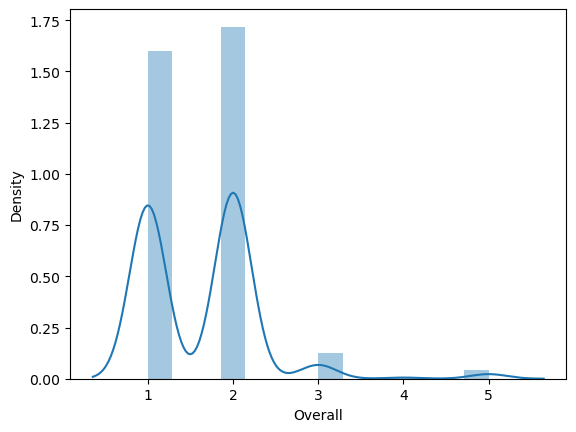

In [65]:
# Distribution of variables
sns.distplot(Films.Overall)
plt.show()

In [66]:
Films.Movie.value_counts()

Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

In [67]:
Films.corr()

_rowstate_    Sinage   Parking     Clean   Overall       Age  \
_rowstate_         NaN       NaN       NaN       NaN       NaN       NaN   
Sinage             NaN  1.000000  0.469180  0.349144  0.382103 -0.089461   
Parking            NaN  0.469180  1.000000  0.440771  0.514429 -0.023468   
Clean              NaN  0.349144  0.440771  1.000000  0.350822 -0.000114   
Overall            NaN  0.382103  0.514429  0.350822  1.000000 -0.032904   
Age                NaN -0.089461 -0.023468 -0.000114 -0.032904  1.000000   
Income             NaN -0.036968 -0.023575  0.016643 -0.005568  0.136119   

              Income  
_rowstate_       NaN  
Sinage     -0.036968  
Parking    -0.023575  
Clean       0.016643  
Overall    -0.005568  
Age         0.136119  
Income      1.000000

<AxesSubplot:>

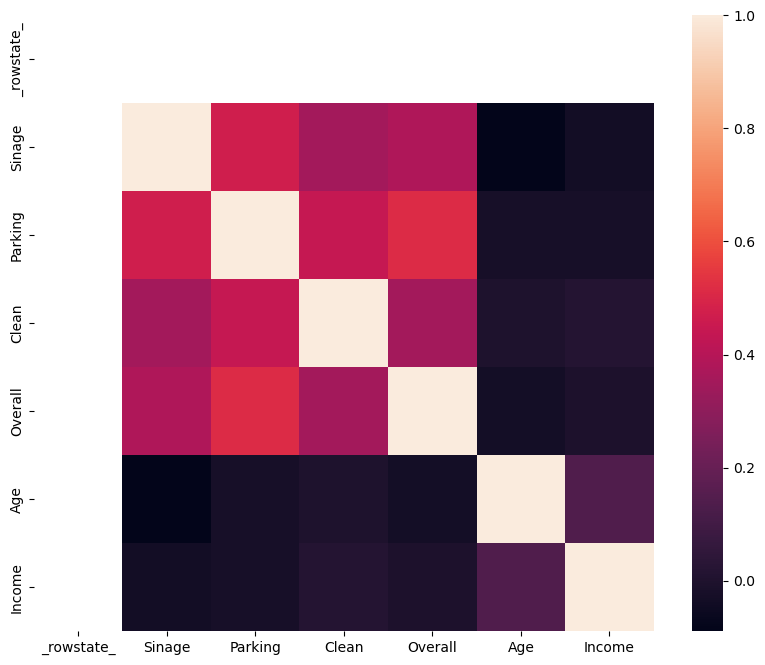

In [68]:
plt.figure(figsize = (10, 8))
sns.heatmap(Films.corr())

In [69]:
Films.Marital_Status.value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [70]:
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [72]:
obs_freq0 = pd.crosstab( Films.Gender, Films.Overall )

In [73]:
obs_freq0

Overall  1.0  2.0  3.0  4.0  5.0
Gender                          
1         46   51    6    0    1
2         90   96    5    1    2
Female    12    7    0    0    0
Male       3    8    1    0    1

In [74]:
stats.chi2_contingency( obs_freq0 )

(12.505799976178544,
 0.40595925068113825,
 12,
 array([[4.75878788e+01, 5.10545455e+01, 3.78181818e+00, 3.15151515e-01,
         1.26060606e+00],
        [8.87696970e+01, 9.52363636e+01, 7.05454545e+00, 5.87878788e-01,
         2.35151515e+00],
        [8.69393939e+00, 9.32727273e+00, 6.90909091e-01, 5.75757576e-02,
         2.30303030e-01],
        [5.94848485e+00, 6.38181818e+00, 4.72727273e-01, 3.93939394e-02,
         1.57575758e-01]]))

##### Overall Satisfaction:
##### These high levels of satisfaction are wonderful news for the promoters, sponsors, and customers of Film
##### on the Rocks. Only five customers reported Poor or Very Poor satisfaction!

In [75]:
obs_freq2 = pd.crosstab( Films.Parking, Films.Overall )

In [76]:
obs_freq2

Overall  1.0  2.0  3.0  4.0  5.0
Parking                         
1.0      105   27    2    0    1
2.0       40  111    3    0    1
3.0        4   20    5    0    0
4.0        2    3    1    0    1
5.0        0    1    1    1    1

In [77]:
stats.chi2_contingency( obs_freq2 )

(230.61691663391676,
 4.783162283608494e-40,
 16,
 array([[6.17727273e+01, 6.62727273e+01, 4.90909091e+00, 4.09090909e-01,
         1.63636364e+00],
        [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
         1.87878788e+00],
        [1.32696970e+01, 1.42363636e+01, 1.05454545e+00, 8.78787879e-02,
         3.51515152e-01],
        [3.20303030e+00, 3.43636364e+00, 2.54545455e-01, 2.12121212e-02,
         8.48484848e-02],
        [1.83030303e+00, 1.96363636e+00, 1.45454545e-01, 1.21212121e-02,
         4.84848485e-02]]))

##### Hence we can conclude that strong retationship between Parking and Overall Satisfaction

In [78]:
obs_freq3 = pd.crosstab( Films.Clean, Films.Overall )

In [79]:
obs_freq3

Overall  1.0  2.0  3.0  4.0  5.0
Clean                           
1.0      104   35    3    0    2
2.0       39  109    5    1    1
3.0        6   14    4    0    0
4.0        1    4    0    0    0
5.0        1    0    0    0    1

In [80]:
stats.chi2_contingency( obs_freq3 )

(127.71945555999517,
 1.7772535915434025e-19,
 16,
 array([[6.58909091e+01, 7.06909091e+01, 5.23636364e+00, 4.36363636e-01,
         1.74545455e+00],
        [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
         1.87878788e+00],
        [1.09818182e+01, 1.17818182e+01, 8.72727273e-01, 7.27272727e-02,
         2.90909091e-01],
        [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
         6.06060606e-02],
        [9.15151515e-01, 9.81818182e-01, 7.27272727e-02, 6.06060606e-03,
         2.42424242e-02]]))

##### Hence we can conclude that strong retationship between Clean and Overall Satisfaction

### Contingency tables for all Variables

In [81]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Gender, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Gender                      1      2  Female  Male
Movie                                             
Ferris Buellers Day Off  38.0   67.0    19.0  13.0
Old School               13.0   19.0     NaN   NaN
Willy Wonka              53.0  108.0     NaN   NaN

In [82]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Sinage, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Sinage                    1.0   2.0   3.0  4.0  5.0
Movie                                              
Ferris Buellers Day Off  53.0  64.0  19.0  NaN  1.0
Old School               12.0  13.0   4.0  2.0  1.0
Willy Wonka              48.0  81.0  25.0  4.0  3.0

In [83]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Parking, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Parking                   1.0   2.0   3.0  4.0  5.0
Movie                                              
Ferris Buellers Day Off  54.0  66.0  11.0  5.0  1.0
Old School               17.0  11.0   3.0  NaN  1.0
Willy Wonka              64.0  78.0  15.0  2.0  2.0

In [84]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Clean, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Clean                     1.0   2.0   3.0  4.0  5.0
Movie                                              
Ferris Buellers Day Off  61.0  62.0  12.0  2.0  NaN
Old School               12.0  16.0   3.0  NaN  1.0
Willy Wonka              71.0  77.0   9.0  3.0  1.0

In [85]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Overall, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Overall                   1.0   2.0  3.0  4.0  5.0
Movie                                             
Ferris Buellers Day Off  59.0  71.0  4.0  1.0  2.0
Old School               21.0  10.0  NaN  NaN  1.0
Willy Wonka              71.0  81.0  8.0  NaN  1.0

In [86]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Income, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Income                   1.000000  1.834395  2.000000  3.000000
Movie                                                          
Ferris Buellers Day Off      54.0       7.0      39.0      37.0
Old School                   14.0       NaN       7.0      11.0
Willy Wonka                  74.0       9.0      36.0      42.0

In [87]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Marital_Status, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Marital_Status              1      2  Married  Single  Slngle
Movie                                                        
Ferris Buellers Day Off  29.0   76.0     12.0    18.0     2.0
Old School               11.0   20.0      NaN     NaN     NaN
Willy Wonka              48.0  112.0      NaN     NaN     NaN